In [2]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from scipy import stats
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to C:\Users\Arjuna
[nltk_data]     Bazaz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
new_filename = 'debate_tweets.csv'
df_original_trump = pd.read_csv('hashtag_donaldtrump.csv') #Add filename
df_original_biden = pd.read_csv('hashtag_joebiden.csv') #Add filename

df_cleaned_trump = df_original_trump[df_original_trump['created_at'] >= '2020-10-21']
df_cleaned_biden = df_original_biden[df_original_biden['created_at'] >= '2020-10-21']

df_cleaned_trump = df_cleaned_trump[df_cleaned_trump['created_at'] <= '2020-10-24']
df_cleaned_biden = df_cleaned_biden[df_cleaned_biden['created_at'] <= '2020-10-24']

df_cleaned_trump = df_cleaned_trump(new_column='trump')
df_cleaned_biden = df_cleaned_biden(new_column='biden')

df_new = pd.concat([df_cleaned_trump, df_cleaned_biden], ignore_index=True)

df_new.to_csv(new_filename, index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'filename_trump'

In [ ]:
df = pd.read_csv("compressed_data.csv\debate_tweets.csv")

print(len(df.columns))

df.drop(['tweet_id', 'source', 'user_id', 'user_description', 'user_join_date', 'user_name', 'user_screen_name', 'lat', 'long', 'city', 'continent', 'state_code', 'collected_at'], axis=1, inplace=True)

df.to_csv("compressed_data.csv\debate_tweets_cleaned.csv", index=False)

22
4.723146621593538


Average number of likes: 4.723146621593538
Average number of retweets: 1.5591931171116253
Average number of user followers: 18418.357707920586
Total Number of Countries With Tweets Gathered: 138


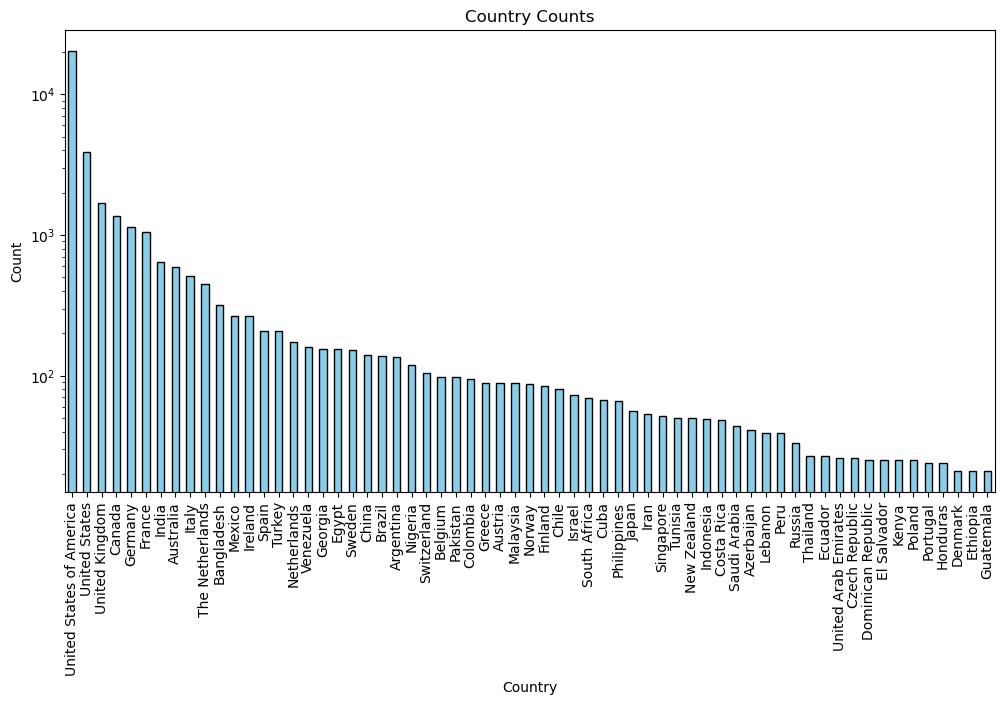

In [34]:
df = pd.read_csv("compressed_data.csv\debate_tweets_cleaned.csv")

print("Average number of likes:", sum(df['likes'])/len(df))

print("Average number of retweets:", sum(df['retweet_count'])/len(df))

print("Average number of user followers:", sum(df['user_followers_count'])/len(df))

country_counts = df['country'].value_counts()
print("Total Number of Countries With Tweets Gathered:", len(country_counts))
country_counts = country_counts[country_counts > 20]

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Counts')
plt.xticks(rotation=90)
plt.show()

Total Number of States With Tweets Gathered: 53


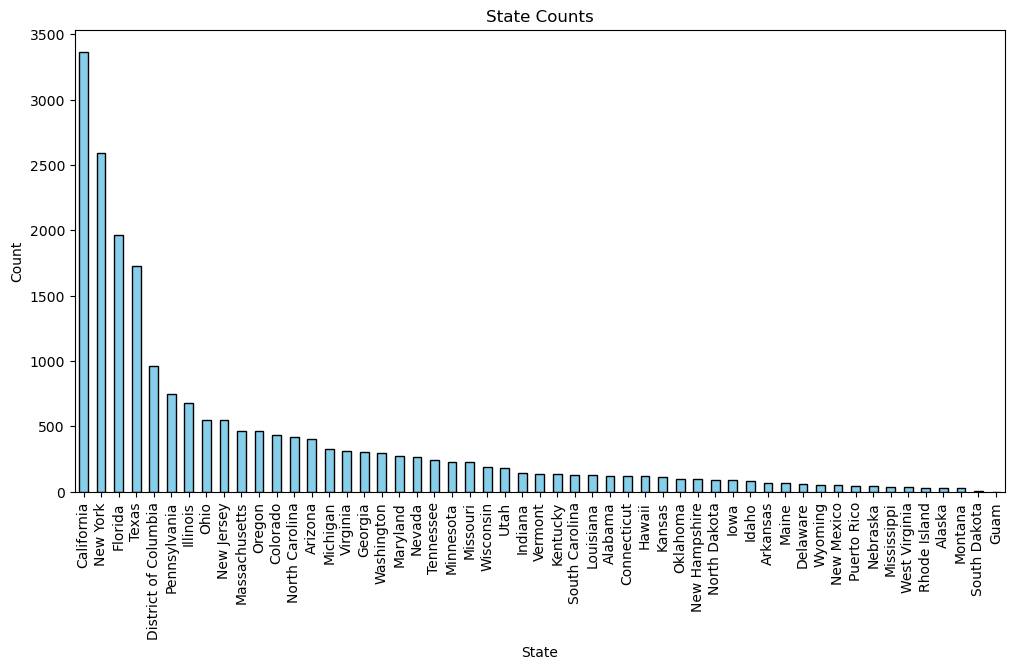

In [38]:
df = pd.read_csv("compressed_data.csv\debate_tweets_cleaned.csv")

state_counts = df[df['country'].str.contains('United States', case=False, na=False)]['state'].value_counts()
print("Total Number of States With Tweets Gathered:", len(state_counts))

plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Counts')
plt.xticks(rotation=90)
plt.show()

about
trump    42584
biden    29595
Name: count, dtype: int64
3.9367368025549503 5.854705186686941


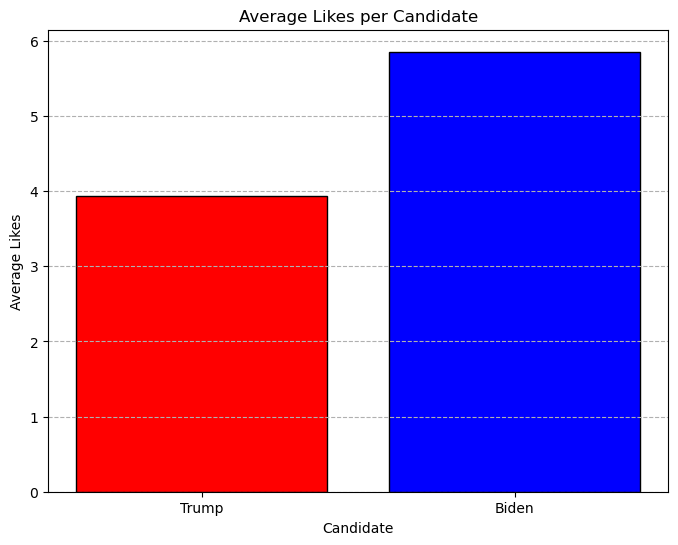

In [45]:
df = pd.read_csv("compressed_data.csv\debate_tweets_cleaned.csv")

country_counts = df['about'].value_counts()
print(country_counts)

filtered_df_trump = df[df['about'] == 'trump']
filtered_df_biden = df[df['about'] == 'biden']

mean_value_trump = filtered_df_trump['likes'].mean()
mean_value_biden = filtered_df_biden['likes'].mean()

print(mean_value_trump, mean_value_biden)

candidates = ['Trump', 'Biden']
means = [mean_value_trump, mean_value_biden]

plt.figure(figsize=(8, 6))
plt.bar(candidates, means, capsize=10, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Candidate')
plt.ylabel('Average Likes')
plt.title('Average Likes per Candidate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()

In [12]:
df = pd.read_csv("compressed_data.csv\debate_tweets_cleaned.csv")

filtered_df_trump = df[df['about'] == 'trump']
filtered_df_biden = df[df['about'] == 'biden']

cutoff_time = "2020-10-22 23:00:00"

filtered_df_trump_before = filtered_df_trump[filtered_df_trump['created_at'] < cutoff_time]
filtered_df_trump_after = filtered_df_trump[filtered_df_trump['created_at'] >= cutoff_time]

filtered_df_biden_before = filtered_df_biden[filtered_df_biden['created_at'] < cutoff_time]
filtered_df_biden_after = filtered_df_biden[filtered_df_biden['created_at'] >= cutoff_time]

print("Trump tweets before 11 PM:", len(filtered_df_trump_before))
print("Trump tweets after 11 PM:", len(filtered_df_trump_after))
print("Biden tweets before 11 PM:", len(filtered_df_biden_before))
print("Biden tweets after 11 PM:", len(filtered_df_biden_after))

filtered_df_trump_before_list = filtered_df_trump['likes'].tolist()
filtered_df_trump_after_list = filtered_df_trump['likes'].tolist()
filtered_df_biden_before_list = filtered_df_biden['likes'].tolist()
filtered_df_biden_after_list = filtered_df_biden['likes'].tolist()

print(filtered_df_trump_before_list)
print(filtered_df_trump_after_list)
print(filtered_df_biden_before_list)
print(filtered_df_biden_after_list)

Trump tweets before 11 PM: 41229
Trump tweets after 11 PM: 1355
Biden tweets before 11 PM: 28379
Biden tweets after 11 PM: 1216
[0.0, 305.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 3.0, 1.0, 9.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 2.0, 0.0, 7.0, 2.0, 0.0, 0.0, 26.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 3.0, 381.0, 0.0, 0.0, 9.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 331.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 12.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 11.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 1.0, 3.0, 7.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment(text):

    # Initialize the SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Get the sentiment scores
    sentiment_scores = sia.polarity_scores(text)

    return sentiment_scores['pos']-sentiment_scores['neg']

In [10]:
def perform_t_test(list1, list2):
  t_statistic, p_value = stats.ttest_rel(list1, list2)
  return t_statistic, p_value

In [13]:
print(perform_t_test(filtered_df_trump_before_list, filtered_df_trump_after_list))
print(perform_t_test(filtered_df_biden_before_list, filtered_df_biden_after_list))

(nan, nan)
(nan, nan)


In [ ]:
avg_biden_before = sum(biden_before)/len(biden_before)
avg_biden_after = sum(biden_after)/len(biden_after)
avg_trump_before = sum(trump_before)/len(trump_before)
avg_trump_after = sum(trump_after)/len(trump_after)

t_stat_biden, p_value_biden = perform_t_test(biden_before, biden_after)
t_stat_trump, p_value_trump = perform_t_test(trump_before, trump_after)